In [1]:
import pandas as pd 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from IPython.display import display, Markdown 
digits = load_digits()
df_digits = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df_digits = df_digits.assign(y = digits['target'])

ModuleNotFoundError: No module named 'seaborn'

## Principal Component Analysis (PCA)

Using PCA, we find directions of maximum variance in high-dimensional data,
We project these directions into a new subspace with the same or fewer dimensions than the original one.

## Maximal Variance and Information Loss
Data points will be projected in the direction of maximal variance to form a new axis. 
The further the points are to the axis, the biggest the information loss.

## Before we dive to the digit example let's review some basic properties of PCA
- Loosely based on the following [scaling importance](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) 

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine_df = wine_df.assign(y = wine['target'])

In [4]:
display(Markdown(wine['DESCR']))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

Original Owners: 

Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies,
Via Brigata Salerno, 16147 Genoa, Italy.

Citation:

Lichman, M. (2013). UCI Machine Learning Repository
[https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
School of Information and Computer Science. 

.. topic:: References

  (1) S. Aeberhard, D. Coomans and O. de Vel, 
  Comparison of Classifiers in High Dimensional Settings, 
  Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Technometrics). 

  The data was used with many others for comparing various 
  classifiers. The classes are separable, though only RDA 
  has achieved 100% correct classification. 
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) 
  (All results using the leave-one-out technique) 

  (2) S. Aeberhard, D. Coomans and O. de Vel, 
  "THE CLASSIFICATION PERFORMANCE OF RDA" 
  Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of 
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Journal of Chemometrics).


<AxesSubplot:>

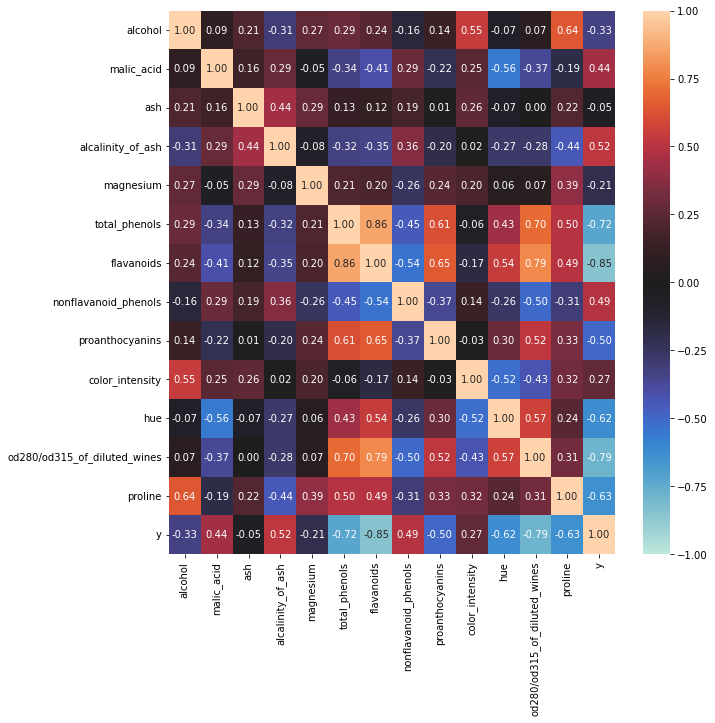

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(wine_df.corr(),vmin=-1,vmax=1,ax=ax,center=0, annot=True, fmt="0.2f")

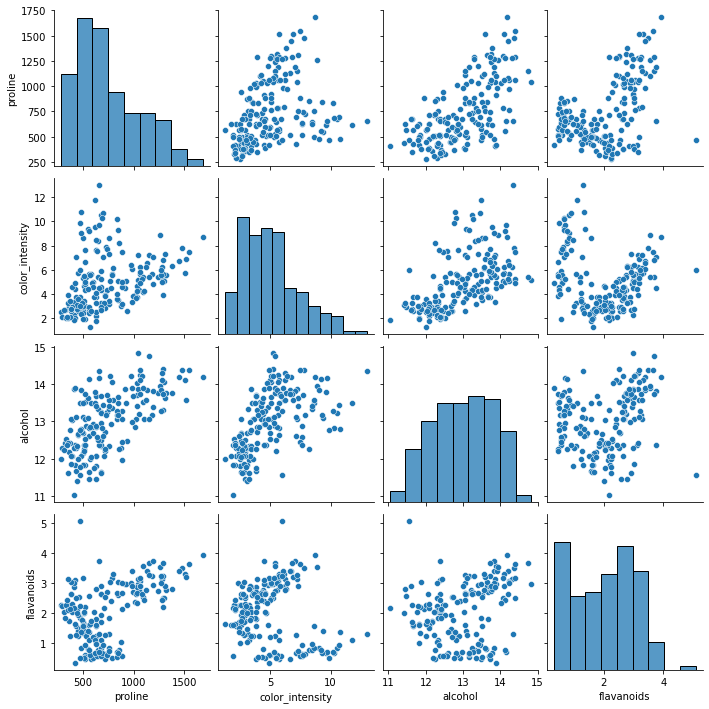

In [6]:
selected_features = ['proline','color_intensity','alcohol','flavanoids']
sns.pairplot(pd.DataFrame(wine_df[selected_features]))

## Reduce dimensionality to 2 features

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

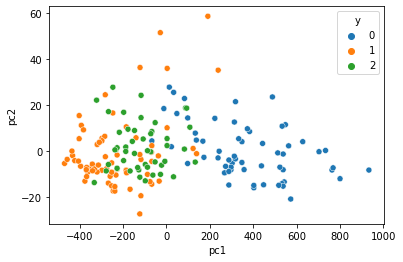

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 1. Define the PCA model with a hyper parameter
features = wine_df.drop(columns='y')
pca.fit(features) # 2. fit to data
wine_reduced = pd.DataFrame(pca.transform(features),columns =['pc1','pc2']).assign(y = wine_df.y) 
sns.scatterplot('pc1','pc2',data=wine_reduced,hue='y',palette='tab10')

In [ ]:
display(Markdown(f'''### Model components : \n
$PC1 = {" + ".join([f"{b:0.3f}x_{{{i+1}}}" for i,b in enumerate(pca.components_[0,:])])}$\n
$PC2 = {" + ".join([f"{b:0.3f}x_{{{i+1}}}" for i,b in enumerate(pca.components_[1,:])])}$\n
'''))

### Model components : 

$PC1 = 0.002x_{1} + -0.001x_{2} + 0.000x_{3} + -0.005x_{4} + 0.018x_{5} + 0.001x_{6} + 0.002x_{7} + -0.000x_{8} + 0.001x_{9} + 0.002x_{10} + 0.000x_{11} + 0.001x_{12} + 1.000x_{13}$

$PC2 = 0.001x_{1} + 0.002x_{2} + 0.005x_{3} + 0.026x_{4} + 0.999x_{5} + 0.001x_{6} + -0.000x_{7} + -0.001x_{8} + 0.005x_{9} + 0.015x_{10} + -0.001x_{11} + -0.003x_{12} + -0.018x_{13}$



In [ ]:
display(Markdown(f'''### Model components explain variance ratio: \n
${", ".join([f"PC{i+1} = {100*r:0.1f}" for i,r in enumerate(pca.explained_variance_ratio_)])}$
'''))

### Model components explain variance ratio: 

$PC1 = 99.8, PC2 = 0.2$


In [ ]:
display(Markdown(f'''### Model components explain variance: \n
${", ".join([f"PC{i+1} = {r:0.1f}" for i,r in enumerate(pca.explained_variance_)])}$
'''))

### Model components explain variance: 

$PC1 = 99201.8, PC2 = 172.5$


# Is this as good as it gets? 

- Feature scaling through standardization (or Z-score normalization) can be an essential preprocessing step for many machine learning algorithms. Standardization involves rescaling the features with the properties of a standard normal distribution with a mean of zero and a standard deviation of one.
- In PCA, we are interested in the components that maximize the variance. For example, suppose one component (e.g. flavonoids) varies less than another (e.g. proline) because of their respective scales. In that case, PCA might determine that the maximal variance more closely corresponds with the proline axis if those features are not scaled.
- PCA is solved via the Singular Value Decomposition, which finds linear subspaces which best represent your data in the squared sense.
- Linear Subspaces are an essential topic of study in Linear Algebra, and the most critical consequence of a linear subspace for PCA is that it has to go through the origin, the point [0, 0, ..., 0].
- By centring our data, we guarantee that they exist near the origin, and it may be possible to approximate them with a low-dimensional linear subspace.
- Scaling is essential because SVD approximates in the sum of squares sense, so if one variable is on a different scale than another, it will dominate the PCA procedure. So the low D plot will just be visualizing that dimension.
- Let's add scaling to the mixture and plot again

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

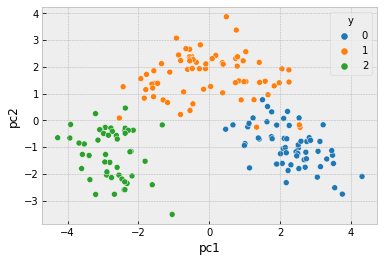

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2) # 1. Define the PCA model with a hyper parameter
scaler = StandardScaler()
features_s = scaler.fit_transform(features)
pca.fit(features_s) # 2. fit to data
wine_s_reduced = pd.DataFrame(pca.transform(features_s),columns =['pc1','pc2']).assign(y = wine_df.y)  
sns.scatterplot('pc1','pc2',data=wine_s_reduced,hue='y',palette='tab10')

In [ ]:
display(Markdown(f'''### Model components : \n
$PC1 = {" + ".join([f"{b:0.3f}x_{{{i+1}}}" for i,b in enumerate(pca.components_[0,:])])}$\n
$PC2 = {" + ".join([f"{b:0.3f}x_{{{i+1}}}" for i,b in enumerate(pca.components_[1,:])])}$\n
'''))

### Model components : 

$PC1 = 0.144x_{1} + -0.245x_{2} + -0.002x_{3} + -0.239x_{4} + 0.142x_{5} + 0.395x_{6} + 0.423x_{7} + -0.299x_{8} + 0.313x_{9} + -0.089x_{10} + 0.297x_{11} + 0.376x_{12} + 0.287x_{13}$

$PC2 = -0.484x_{1} + -0.225x_{2} + -0.316x_{3} + 0.011x_{4} + -0.300x_{5} + -0.065x_{6} + 0.003x_{7} + -0.029x_{8} + -0.039x_{9} + -0.530x_{10} + 0.279x_{11} + 0.164x_{12} + -0.365x_{13}$



In [ ]:
display(Markdown(f'''### Model components explain variance ratio: \n
${", ".join([f"PC{i+1} = {100*r:0.1f}" for i,r in enumerate(pca.explained_variance_ratio_)])}$
'''))

### Model components explain variance ratio: 

$PC1 = 36.2, PC2 = 19.2$


In [ ]:
display(Markdown(f'''### Model components explain variance: \n
${", ".join([f"PC{i+1} = {r:0.1f}" for i,r in enumerate(pca.explained_variance_)])}$
'''))

### Model components explain variance: 

$PC1 = 4.7, PC2 = 2.5$


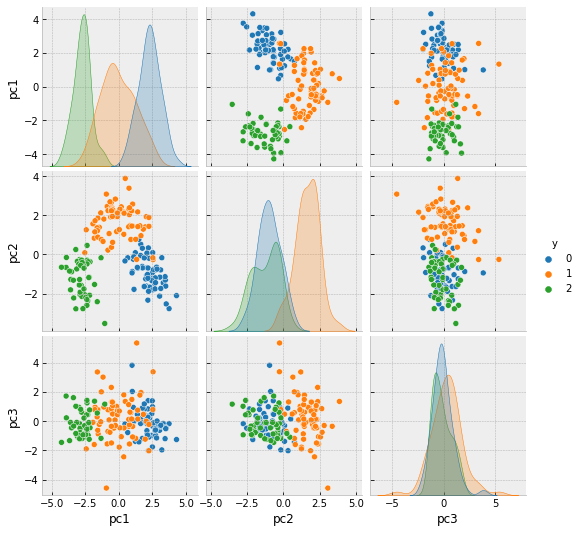

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=3) # 1. Define the PCA model with a hyper parameter
scaler = StandardScaler()
features_s = scaler.fit_transform(features)
pca.fit(features_s) # 2. fit to data
wine_s_reduced = pd.DataFrame(pca.transform(features_s),columns =['pc1','pc2','pc3']).assign(y = wine_df.y)  
sns.pairplot(data=wine_s_reduced,hue='y',palette='tab10')

In [ ]:
display(Markdown(f'''### Model components explain variance ratio: \n
${", ".join([f"PC{i+1} = {100*r:0.1f}" for i,r in enumerate(pca.explained_variance_ratio_)])}$
'''))

### Model components explain variance ratio: 

$PC1 = 36.2, PC2 = 19.2, PC3 = 11.1$


### How many components is enough? 
#### Rule of thumb 1 
- The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. 
- Generally, PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis.

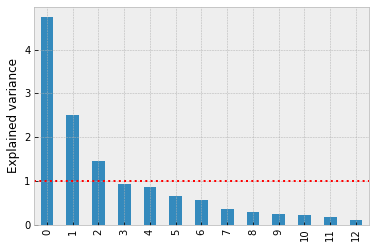

In [ ]:
pca = PCA() # 1. Define the PCA model with default
scaler = StandardScaler()  # 2. scale the data
features_s = scaler.fit_transform(features) # 3. transform the data
pca.fit(features_s) # 4. fit to data
exp_var = pca.explained_variance_
ax = pd.Series(exp_var).plot.bar()
ax.set_ylabel('Explained variance')
ax.hlines(1,-0.5,12.5,color='r',linestyles=':')

#### Rule of thumb 2 
- Scree plot (for elbow test) is another graphical technique useful in PCs retention. 
- We should keep the PCs where there is a sharp change in the slope of the line connecting adjacent PCs.


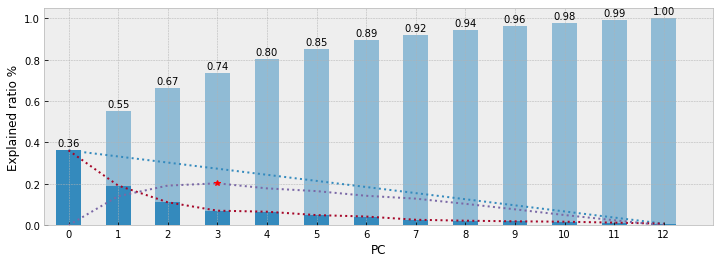

In [ ]:
exp_ratio = pca.explained_variance_ratio_
def scree_plot(y,plot=True):
    
    ys, n = y/np.sum(y), y.shape[0]
    yl = np.linspace(ys[0],ys[-1],n)
    dtl = ((ys - yl)**2)**0.5
    data = pd.DataFrame(dict(y=y, ys=ys, yl=yl, dtl=dtl))
    elbow,value = data.agg(pc = ('dtl','argmax'), value = ('dtl','max')).to_numpy()
    if plot: 
        ax = data.y.cumsum().plot.bar(alpha=0.5,figsize=(12,4))
        ax.bar_label(ax.containers[0],padding=2,fontsize=10,color='k',fmt='%.2f')     
        data.y.plot.bar(ax=ax)
        data.yl.plot(ax=ax,linestyle=':')
        data.ys.plot(ax=ax,linestyle=':')
        data.dtl.plot(ax=ax,linestyle=':')
        ax.set_ylabel('Explained ratio %')
        ax.set_xlabel('PC')
        ax.plot(elbow,value,'r*')
        xlim = [-0.5,15] if n > 15 and elbow < 15 else [-0.5,n] if n < 15 else [-0.5,elbow+2]
        ax.set_xlim(*xlim)
        
    return int(elbow)
    
elbow = scree_plot(exp_ratio)

#### Rule of thumb 3
- Identify the number of components that maximise the utility 
- This depends on the problem you are trying to solve and we will touch on this next week
